In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.api.types import is_string_dtype, is_numeric_dtype
# import pandas_profiling
# import re
# import requests
# from IPython.display import display
# import seaborn as sns
# from scipy.stats import norm
# from scipy import stats

# import matplotlib.ticker as ticker
# from matplotlib.ticker import NullFormatter
# import matplotlib.image as mpimg
# import pydotplus
# from sklearn import preprocessing
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.externals.six import StringIO
# from sklearn import tree
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# import warnings
# import types

%load_ext autoreload
%autoreload 2
 
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
data = pd.read_csv('../data/Data_crimeMinMaxScaled.csv', index_col=0) 
X = data.iloc[:, 2:]
ys = data.iloc[:, :2] # GardenCounts, HasGarden
y = data[['HasGarden']]
X.head()

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
NTA,,,,,,,,,,,,,,,,,,
Bath Beach,0.496849,0.147393,0.070566,0.176733,0.436933,0.012182,0.361095,0.013057,0.433409,0.299790,0.266801,0.663798,0.224372,0.111829,0.010496,0.012187,0.016769,0.012089
Bay Ridge,0.521963,0.156444,0.074922,0.178608,0.634329,0.019094,0.145513,0.022456,0.409413,0.289008,0.301580,0.535735,0.271976,0.192289,0.011752,0.015232,0.027670,0.015315
Bedford,0.515508,0.077219,0.125027,0.194933,0.350607,0.405826,0.030404,0.018229,0.575924,0.229287,0.194789,0.678193,0.204352,0.117455,0.028667,0.023144,0.038305,0.026313
Bensonhurst East,0.513234,0.157266,0.085202,0.123283,0.465153,0.008262,0.386793,0.016509,0.510524,0.290981,0.198495,0.698153,0.204564,0.097283,0.010267,0.008911,0.017379,0.010138
Bensonhurst West,0.512788,0.142625,0.088342,0.145975,0.426773,0.008740,0.405168,0.013345,0.492862,0.285700,0.221438,0.737618,0.188800,0.073582,0.009682,0.008536,0.015215,0.009528


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [13]:
print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (152, 18) (152, 1)
Testing set:  (39, 18) (39, 1)


In [11]:
corr = X.corr()
corr

,Gender_Female,Age_Over65,Unemployed,Race_Hisp,Race_White,Race_Black,Race_Asian,Race_Other,Income_Low,Income_Mid,Income_High,Edu_Other,Edu_Bachelor,Edu_GradProf,Crime_Felony_MMscaled,Crime_Misdemeanor_MMscaled,Crime_Violation_MMscaled,Crime_Total_MMscaled
Gender_Female,1.000000,0.267584,0.248624,-0.166976,-0.186493,0.500249,-0.243248,-0.090644,0.141442,-0.129660,-0.109315,-0.000652,-0.061541,0.055967,-0.407713,-0.410880,-0.393781,-0.409498
Age_Over65,0.267584,1.000000,-0.373375,-0.483023,0.438915,-0.180144,0.188590,-0.083464,-0.339507,0.165840,0.315992,-0.277292,0.219460,0.313277,-0.034237,-0.031648,-0.113383,-0.039269
Unemployed,0.248624,-0.373375,1.000000,0.539623,-0.671950,0.462886,-0.305218,0.047159,0.715391,-0.220815,-0.713265,0.604967,-0.579260,-0.594062,-0.085930,-0.087692,-0.031348,-0.082716
Race_Hisp,-0.166976,-0.483023,0.539623,1.000000,-0.575417,-0.055280,-0.236369,-0.152079,0.648491,-0.233712,-0.634195,0.532712,-0.529717,-0.505629,-0.027989,-0.010613,0.008058,-0.014519
Race_White,-0.186493,0.438915,-0.671950,-0.575417,1.000000,-0.630220,0.034624,-0.126817,-0.627256,-0.033596,0.709156,-0.673433,0.648306,0.658188,0.064599,0.064314,0.031831,0.061885
Race_Black,0.500249,-0.180144,0.462886,-0.055280,-0.630220,1.000000,-0.442680,0.062753,0.279667,0.069947,-0.336448,0.376092,-0.382596,-0.349301,-0.007625,-0.015736,0.018552,-0.010420
Race_Asian,-0.243248,0.188590,-0.305218,-0.236369,0.034624,-0.442680,1.000000,0.184233,-0.194072,0.251345,0.122916,-0.123485,0.175678,0.070138,-0.079935,-0.088146,-0.113655,-0.087905
Race_Other,-0.090644,-0.083464,0.047159,-0.152079,-0.126817,0.062753,0.184233,1.000000,-0.194211,0.183062,0.148245,-0.076832,0.089536,0.061235,0.065724,0.050676,0.059832,0.056248
Income_Low,0.141442,-0.339507,0.715391,0.648491,-0.627256,0.279667,-0.194072,-0.194211,1.000000,-0.451551,-0.944349,0.718352,-0.708231,-0.687244,-0.091627,-0.076682,-0.067058,-0.080738
Income_Mid,-0.129660,0.165840,-0.220815,-0.233712,-0.033596,0.069947,0.251345,0.183062,-0.451551,1.000000,0.132921,0.101924,-0.026764,-0.163124,0.025032,0.012481,0.035504,0.018323


# Decision Tree

In [15]:
# Train classifier, max depth=2 to control for overfitting
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X_train, y_train) 

In [24]:
# Evaluate Model
from sklearn import metrics

dtc_pred = dtc.predict(X_test)

print('Train set Accuracy: ', metrics.accuracy_score(y_train, dtc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, dtc_pred))

Train set Accuracy:  0.7960526315789473
Test set Accuracy:  0.5641025641025641


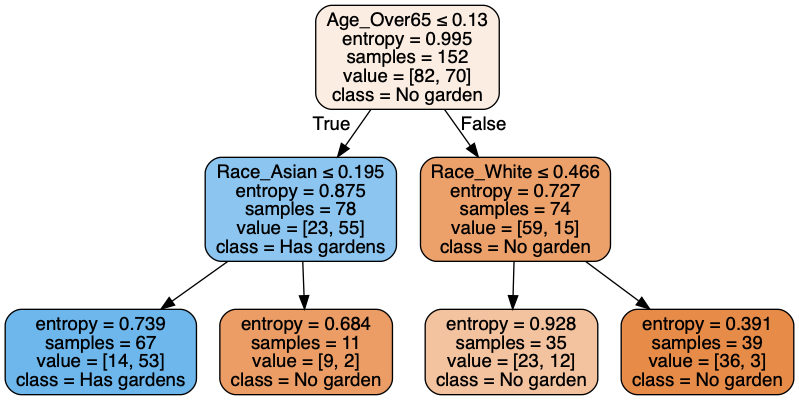

In [25]:
# visualizing decision tree
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, 
                feature_names=X.columns,
                class_names=['No garden','Has gardens'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gardens.png')
Image(graph.create_png())

In [33]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, dtc_pred) # tn, fp, fn, tp
_ = [print(x_i) for x_i in zip(['true neg', 'false positive', 'false neg', 'true positive'], CM.ravel())]
# honestly p bad performance


## Visualize it as a heatmap
# import seaborn
# seaborn.heatmap(CM)
# plt.show()

('true neg', 9)
('false positive', 7)
('false neg', 10)
('true positive', 13)


# Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# train
# the number of trees in the forest set to 20 (default is 10)
rfc = RandomForestClassifier(n_estimators=20, min_samples_leaf=5).fit(X_train, y_train)

# eval
print('Train set Accuracy: ', metrics.accuracy_score(y_train, rfc.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, rfc.predict(X_test)))

Train set Accuracy:  0.881578947368421
Test set Accuracy:  0.5897435897435898


/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


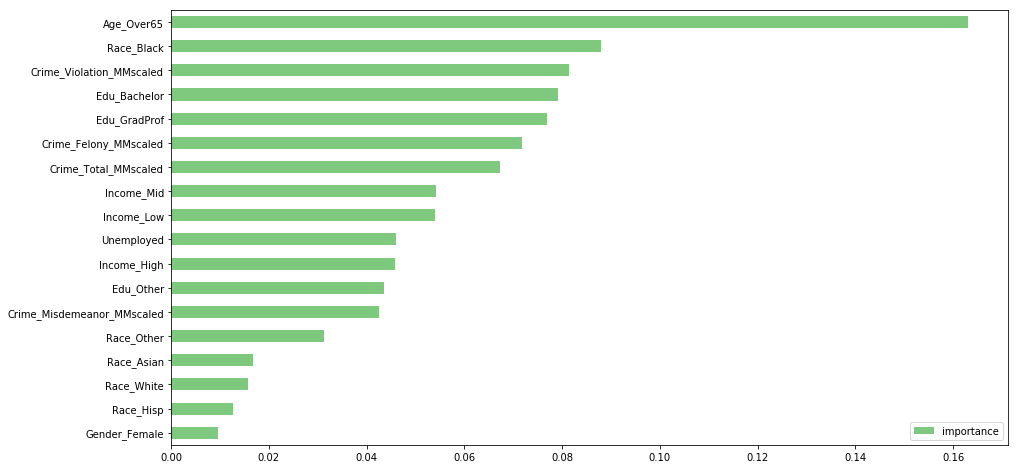

In [20]:
# feature importance
df_feat_importance = pd.DataFrame({'importance' : rfc.feature_importances_}, index = X.columns)
df_feat_importance.sort_values(by='importance', ascending=True ).plot(kind='barh',colormap ='Accent', figsize=(15,8))

In [21]:
df = pd.DataFrame({'importance' : rfc.feature_importances_}, index = X.columns)
df.sort_values(by='importance', ascending=False )

,importance
Age_Over65,0.163051
Race_Black,0.088044
Crime_Violation_MMscaled,0.081357
Edu_Bachelor,0.079113
Edu_GradProf,0.076918
Crime_Felony_MMscaled,0.071884
Crime_Total_MMscaled,0.067327
Income_Mid,0.054131
Income_Low,0.054112
Unemployed,0.045933


In [32]:
from sklearn.feature_selection import SelectFromModel

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

sel.get_support()

selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

print(selected_feat)
sel.get_support().sum() 

Index(['PopOv65N', 'BlackN', 'CLF_UnemployedN', 'EduOtherN', 'Inc_low',
       'Inc_mid', 'FELONY_norm', 'MISDEMEANOR_norm'],
      dtype='object')


8

In [33]:
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
# cross_val_score(estimator, features, target, chosen scoring method) assigned to the variable "scores."
# scores will be a numpy array
scores = cross_val_score(rfc, X, y, cv=3, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

# A for loop for running a Random Forest Classifier with n-estimators (or number of trees in your forest).
# The is 1 to 100 in steps of 10 - range(start, end, step)
for n_trees in range(1, 100, 10):
    rfc = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(rfc, X, y, cv=3, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

CV AUC [0.58547794 0.54933586 0.7688172 ], Average AUC 0.634543669618385
n trees: 1, CV AUC [0.50183824 0.4288425  0.64076246], Average AUC 0.5238144011270197
n trees: 11, CV AUC [0.57490809 0.44734345 0.72043011], Average AUC 0.5808938830908709
n trees: 21, CV AUC [0.56479779 0.5256167  0.72434018], Average AUC 0.6049182227876487
n trees: 31, CV AUC [0.49540441 0.44354839 0.81524927], Average AUC 0.5847340219078835
n trees: 41, CV AUC [0.55928309 0.49905123 0.73851417], Average AUC 0.5989494985433078
n trees: 51, CV AUC [0.56571691 0.51185958 0.76392962], Average AUC 0.613835371025243
n trees: 61, CV AUC [0.56571691 0.55645161 0.73167155], Average AUC 0.6179466929733769
n trees: 71, CV AUC [0.55744485 0.51850095 0.71554252], Average AUC 0.5971627745673049
n trees: 81, CV AUC [0.52435662 0.53842505 0.7086999 ], Average AUC 0.5904938557778928
n trees: 91, CV AUC [0.52849265 0.49857685 0.7228739 ], Average AUC 0.5833144658156518


In [ ]:
# Trying WITHOUT CRIME data

In [43]:
rf1 = acsgc[['NTA','MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN',
       'EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high',
           'HasGarden']].copy()

In [44]:
rf1 = rf1.replace([np.inf, -np.inf, np.nan], 0)

In [47]:
feature_cols1 = ['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 
                'Inc_high']

X1=rf1[['MaleEN', 'FemEN','PopOv65N','HispN','WhiteN', 'BlackN','Asian_other',
           'CLF_UnemployedN','EduOtherN','EduBachelor', 'EduGradProf','Inc_low', 'Inc_mid', 'Inc_high']]  # Features

y1=rf1['HasGarden']  # Labels

In [48]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state = 1)

In [49]:
print('Training set: ', X1_train.shape, y1_train.shape)
print('Testing set: ', X1_test.shape, y1_test.shape)

Training set:  (136, 14) (136,)
Testing set:  (59, 14) (59,)


In [50]:
#Building Decision Tree Model

# Create Decision Tree classifer object
dtc1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
dtc1 = DecisionTreeClassifier(criterion='entropy', max_depth=2).fit(X1_train, y1_train)

#max depth = 2 to control for overfitting

In [51]:
#Predict the response for test dataset
yhat1 = dtc1.predict(X1_test)

In [52]:
print('Train set Accuracy: ', metrics.accuracy_score(y1_train, dtc1.predict(X1_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y1_test, yhat1))

Train set Accuracy:  0.75
Test set Accuracy:  0.559322033898305


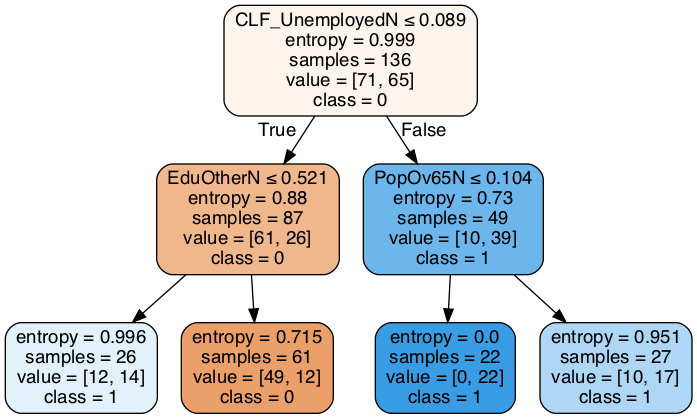

In [54]:
#visualizing decision tree

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtc1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols1,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('gardens.png')
Image(graph.create_png())

[[14 16]
 [10 19]]


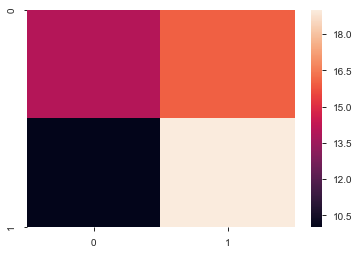

In [57]:
# Visualise classical Confusion Matrix
from sklearn.metrics import confusion_matrix

CM1 = confusion_matrix(y1_test, yhat1)
print(CM1)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM1)
plt.show()

In [58]:
# Import RandomForestClassifier from scikit's ensemble module
from sklearn.ensemble import RandomForestClassifier

# Instanitate your Random Forest Classifier model object with n_estimators or
# the number of trees in the forest set to 20 (default is 10)
model = RandomForestClassifier(n_estimators = 20,min_samples_leaf = 5)

#rf_clf = RandomForestClassifier(n_estimators=100 , max_depth=25, min_samples_split = 2, min_samples_leaf = 2 )

rfc1 = RandomForestClassifier(n_estimators = 20, min_samples_leaf = 5).fit(X1_train, y1_train)


In [59]:
# Fit your model on the features (X) and the target (y)

yhatRF1 = rfc1.predict(X1_test)

In [61]:
print('Train set Accuracy: ', metrics.accuracy_score(y1_train, rfc1.predict(X1_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y1_test, yhatRF1))

Train set Accuracy:  0.8897058823529411
Test set Accuracy:  0.711864406779661


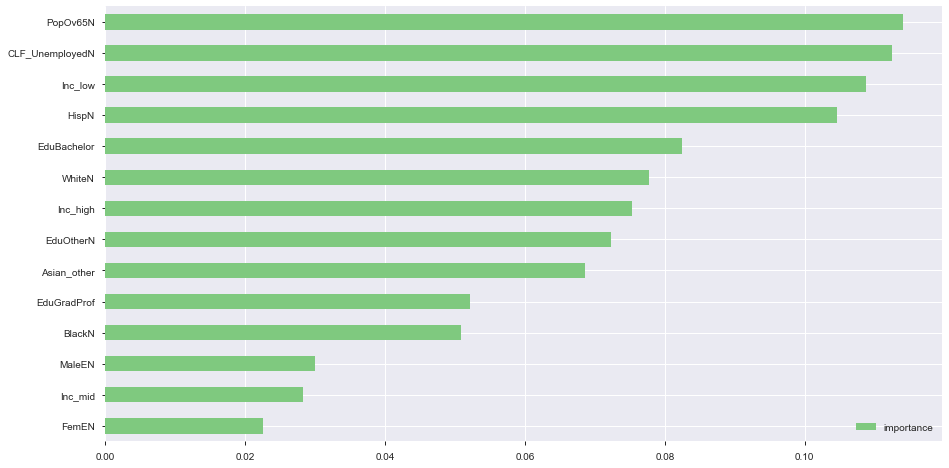

In [62]:
df_feat_importance = pd.DataFrame({'importance' : rfc1.feature_importances_}, index = X1.columns)
df_feat_importance.sort_values(by='importance', ascending=True ).plot(kind='barh',colormap ='Accent', figsize=(15,8))

In [63]:
df = pd.DataFrame({'importance' : rfc1.feature_importances_}, index = X1.columns)
df.sort_values(by='importance', ascending=False)

,importance
PopOv65N,0.113997
CLF_UnemployedN,0.112500
Inc_low,0.108787
HispN,0.104606
EduBachelor,0.082389
WhiteN,0.077745
Inc_high,0.075298
EduOtherN,0.072322
Asian_other,0.068566
EduGradProf,0.052129
